In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


**Creating synthetic data using normal distribution:**

In [103]:
np.random.seed(0)

#generating normal data centered around a mean
normal_data = np.random.normal(loc=0.5, scale=0.1, size=(1000, 2))

#generate anomaly data points, distinct from normal data
anamalies = np.random.uniform(low=0.0, high=1.0, size=(50,2))

In [104]:
normal_data.shape

(1000, 2)

In [105]:
normal_data

array([[0.67640523, 0.54001572],
       [0.5978738 , 0.72408932],
       [0.6867558 , 0.40227221],
       ...,
       [0.51978282, 0.50977508],
       [0.64015234, 0.51584338],
       [0.38580986, 0.36890296]])

In [106]:
import seaborn as sns

<Axes: ylabel='Density'>

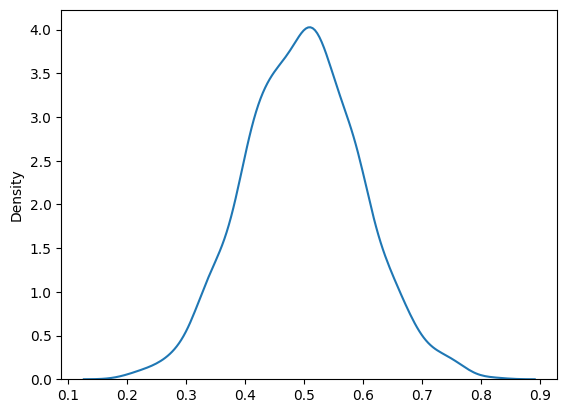

In [107]:
sns.kdeplot(normal_data[:,0])

In [108]:
#Example

x = np.array([[5,6], [7,8]])
y = np.array([[1,2], [4,8]])

In [109]:
x

array([[5, 6],
       [7, 8]])

In [110]:
y

array([[1, 2],
       [4, 8]])

In [111]:
np.vstack([x,y])

array([[5, 6],
       [7, 8],
       [1, 2],
       [4, 8]])

In [112]:
row_mask = np.any((anamalies < 0.2) | (anamalies > 0.8), axis=1)
anomalies = anamalies[row_mask]

# Filter the labels for anomalies using the same row_mask
anomaly_labels = np.array([1] * len(anamalies))
filtered_anomaly_labels = anomaly_labels[row_mask]

# Combine the labels for normal data and filtered anomaly labels
labels = np.array([0] * len(normal_data))
labels = np.concatenate([labels, filtered_anomaly_labels])


#combine into a single dataset
data = np.vstack([normal_data, anomalies])

#0 for normal, 1 for anomaly

In [113]:
row_mask

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False])

In [114]:
data.shape

(1029, 2)

In [115]:
labels.shape

(1029,)

In [116]:
pd.Series(labels).value_counts()

,count
0,1000
1,29


In [117]:
scalr = MinMaxScaler()
data_scaled = scalr.fit_transform(data)

In [118]:
# train autoencoder only on the normal data

train_data = data_scaled[labels == 0]
test_data = data_scaled
test_labels= labels

<Axes: ylabel='Density'>

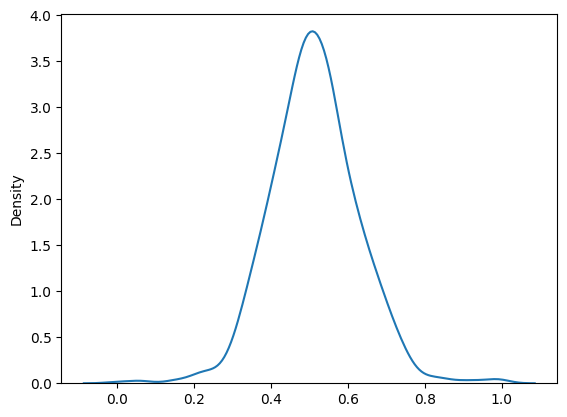

In [137]:
sns.kdeplot(test_data[:,1])

In [138]:
input_dim = train_data.shape[1]
latent_dim = 1

In [139]:
class Autoencoder(tf.keras.Model):
    def __init__(self,input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(2,)), # Input layer matching the data dimension
            layers.Dense(8, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(8, activation='relu'),
            layers.Dense(2, activation='sigmoid'), # Output layer matching the data dimension and scaled data range
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)

In [140]:
#create object of autoencodeer

autoencoder = Autoencoder(input_dim, latent_dim)

In [141]:
#compile model with optimization loss and evaluation
autoencoder.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [142]:
history = autoencoder.fit(train_data, train_data, epochs=50, batch_size=5) #supervised learning

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0810 - mae: 0.0810
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0702 - mae: 0.0702
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0662 - mae: 0.0662
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0650 - mae: 0.0650
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0621 - mae: 0.0621
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0621 - mae: 0.0621
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0603 - mae: 0.0603
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0596 - mae: 0.0596
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0577 - mae: 0.0577
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0560 - mae: 0.0560
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0537 - mae: 0.0537
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0500 - mae: 0.0500
Epoch 13/50
200/200 ━━━━━

In [143]:
reconstructions = autoencoder.predict(test_data, batch_size=1)

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [144]:
reconstructions

array([[0.66960007, 0.5085627 ],
       [0.5940477 , 0.50873554],
       [0.6789402 , 0.5085401 ],
       ...,
       [0.85999006, 0.5054242 ],
       [0.6672034 , 0.50856847],
       [0.84626454, 0.5064932 ]], dtype=float32)

In [145]:
test_data

array([[0.67371321, 0.55391871],
       [0.59379904, 0.74657649],
       [0.68424603, 0.4097516 ],
       ...,
       [0.95611479, 0.39570411],
       [0.67071458, 0.98609615],
       [0.91956633, 0.82530049]])